In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df_train = pd.read_csv('Salary_Dataset_with_Extra_Features.csv')
df_train.head()

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore,Full Time,Android
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,Full Time,Android


In [7]:
df_train.describe()

,Rating,Salary,Salaries Reported
count,22770.000000,2.277000e+04,22770.000000
mean,3.918213,6.953872e+05,1.855775
std,0.519675,8.843990e+05,6.823668
min,1.000000,2.112000e+03,1.000000
25%,3.700000,3.000000e+05,1.000000
50%,3.900000,5.000000e+05,1.000000
75%,4.200000,9.000000e+05,1.000000
max,5.000000,9.000000e+07,361.000000


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22770 entries, 0 to 22769
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rating             22770 non-null  float64
 1   Company Name       22770 non-null  object 
 2   Job Title          22770 non-null  object 
 3   Salary             22770 non-null  int64  
 4   Salaries Reported  22770 non-null  int64  
 5   Location           22770 non-null  object 
 6   Employment Status  22770 non-null  object 
 7   Job Roles          22770 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 1.4+ MB


In [9]:
df_train.isna().sum()

Rating               0
Company Name         0
Job Title            0
Salary               0
Salaries Reported    0
Location             0
Employment Status    0
Job Roles            0
dtype: int64

In [11]:
for label, content in df_train.items():
  if pd.api.types.is_string_dtype(content):
    print(label)

Company Name
Job Title
Location
Employment Status
Job Roles


In [12]:
for label, content in df_train.items():
  if pd.api.types.is_numeric_dtype(content):
    print(label)

Rating
Salary
Salaries Reported


In [13]:
for label, content in df_train.items():
    if pd.api.types.is_string_dtype(content):
        df_train[label] = content.astype("category").cat.as_ordered()

In [14]:
for label,content in df_train.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add binary column to indicate whether sample had missing value
        df_train[label+"is_missing"]=pd.isnull(content)
        # Turn categories into numbers and add+1
        df_train[label] = pd.Categorical(content).codes+1

In [15]:
df_train.isna().sum()

Rating                         0
Company Name                   0
Job Title                      0
Salary                         0
Salaries Reported              0
Location                       0
Employment Status              0
Job Roles                      0
Company Nameis_missing         0
Job Titleis_missing            0
Locationis_missing             0
Employment Statusis_missing    0
Job Rolesis_missing            0
dtype: int64

## DATA VISUALIZATION

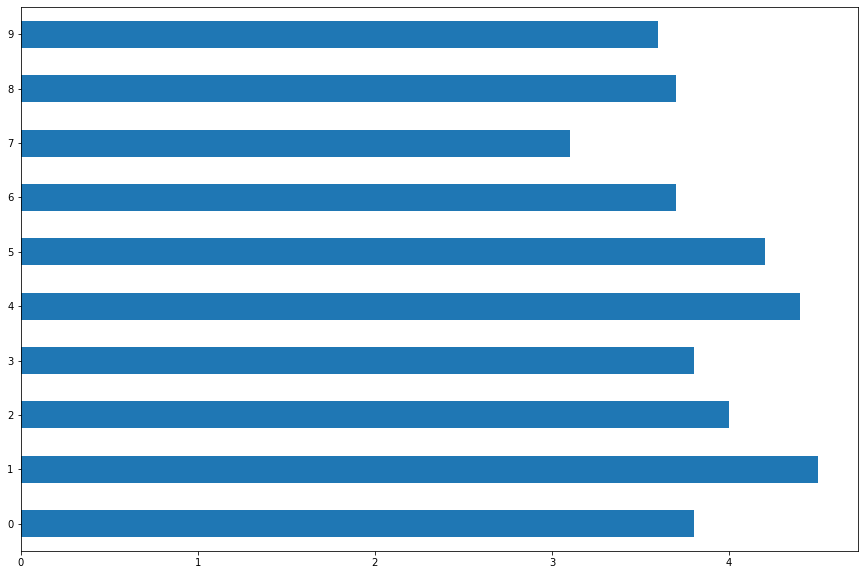

In [18]:
ms = df_train["Rating"][:10].plot.barh(figsize=(15,10))


<Axes: >

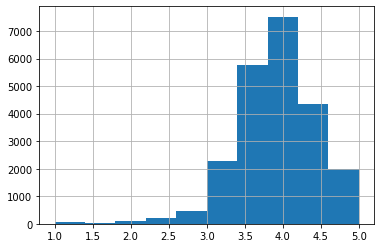

In [19]:
df_train["Rating"].hist()

In [20]:
df_tmp = df_train.copy()

In [21]:
df_tmp.head()

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles,Company Nameis_missing,Job Titleis_missing,Locationis_missing,Employment Statusis_missing,Job Rolesis_missing
0,3.8,8131,29,400000,3,1,2,1,False,False,False,False,False
1,4.5,418,29,400000,3,1,2,1,False,False,False,False,False
2,4.0,9779,29,1000000,3,1,2,1,False,False,False,False,False
3,3.8,8535,29,300000,3,1,2,1,False,False,False,False,False
4,4.4,885,29,600000,3,1,2,1,False,False,False,False,False


In [22]:
X = df_tmp.drop("Rating",axis=1)
y = df_tmp["Rating"]

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
model = RandomForestRegressor(n_jobs=-1)
model.fit(X_train,y_train)

RandomForestRegressor(n_jobs=-1)

In [24]:
from sklearn.metrics import mean_absolute_error
y_preds_0 = model.predict(X_test)
mae_rf = mean_absolute_error(y_test,y_preds_0)
mae_rf

0.35314544722588204

<Axes: title={'center': 'AGE DISTRIBUTION'}, ylabel='Density'>

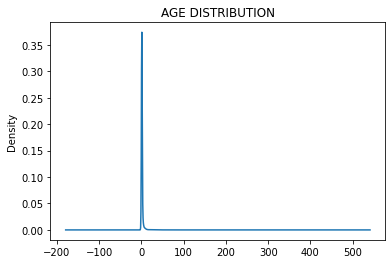

In [30]:
plt.title("AGE DISTRIBUTION")
df['Salaries Reported'].plot(kind='kde')
